In [19]:
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
# DATA_PATH = ../data/a2/data
DATA_PATH = os.path.join("..", "data", "a2", "data")
TRAIN_PATH = os.path.join(DATA_PATH, "train")
TEST_PATH = os.path.join(DATA_PATH, "test")


In [21]:
FOLDERS = os.listdir(TRAIN_PATH)
FOLDERS


['bedroom',
 'Coast',
 'Forest',
 'Highway',
 'industrial',
 'Insidecity',
 'kitchen',
 'livingroom',
 'Mountain',
 'Office',
 'OpenCountry',
 'store',
 'Street',
 'Suburb',
 'TallBuilding']

In [22]:
import random

random.seed(42)

rand_imgs = [
    random.choice(os.listdir(os.path.join(TRAIN_PATH, folder))) for folder in FOLDERS
]


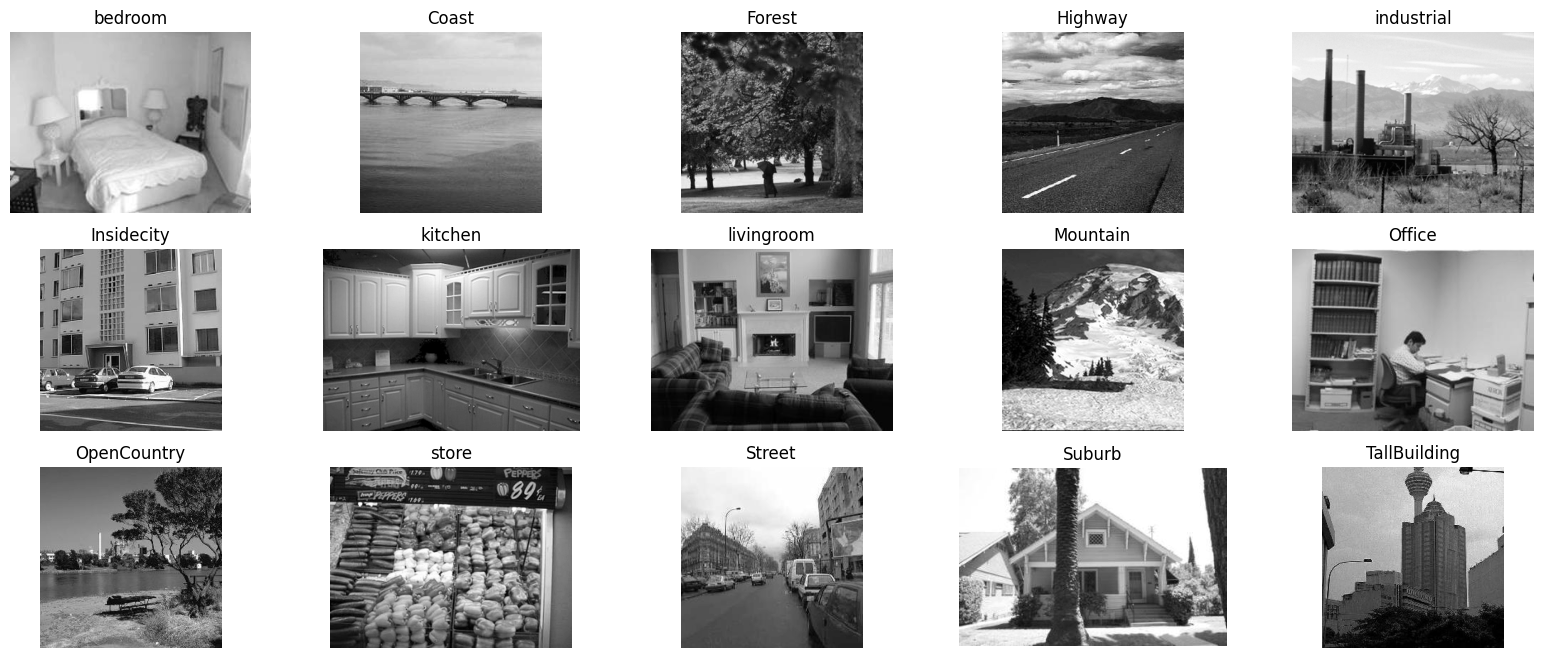

In [23]:
fig, axes = plt.subplots(3, 5, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    img = Image.open(os.path.join(TRAIN_PATH, FOLDERS[i], rand_imgs[i]))
    ax.imshow(img, cmap="gray")
    ax.set_title(FOLDERS[i])
    ax.axis("off")

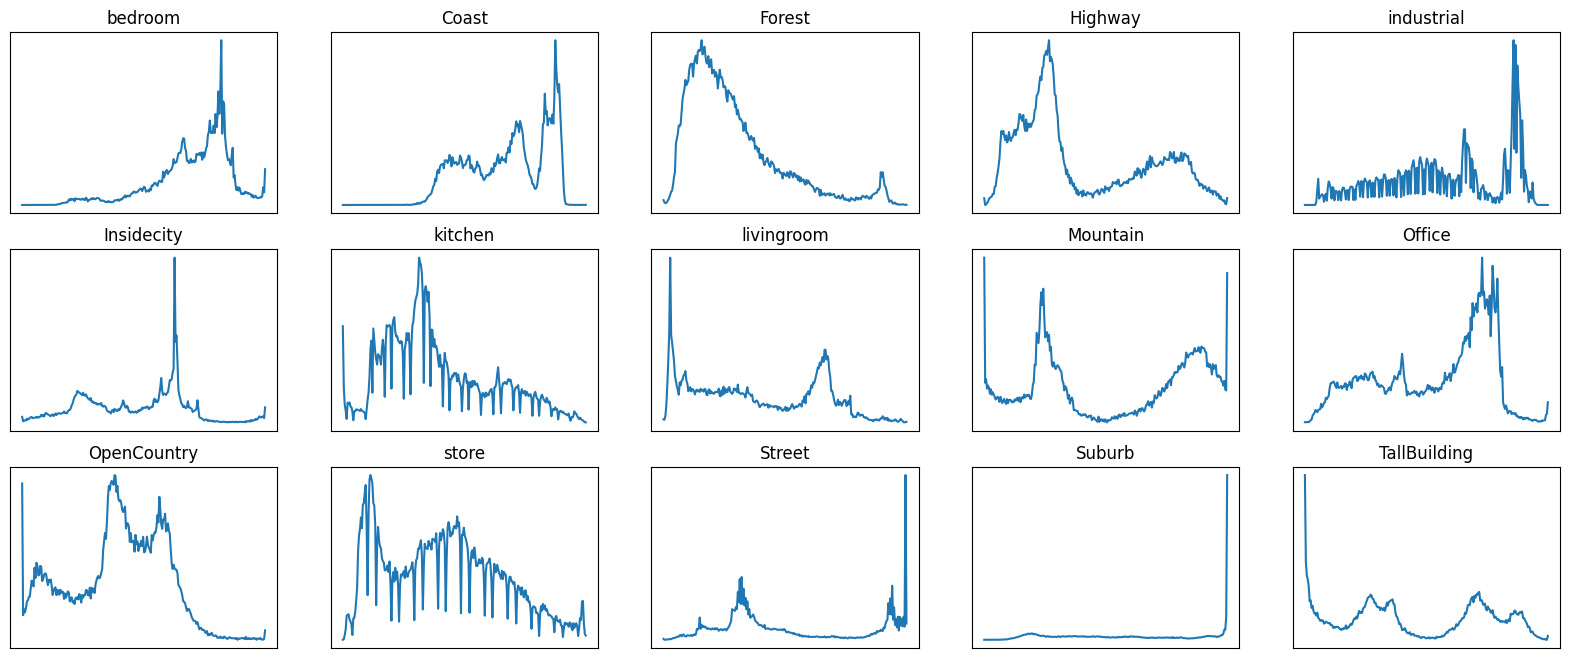

In [24]:
fig, axes = plt.subplots(3, 5, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    img = Image.open(os.path.join(TRAIN_PATH, FOLDERS[i], rand_imgs[i]))
    ax.plot(img.histogram())
    ax.set_title(FOLDERS[i])
    ax.set_xticks([])
    ax.set_yticks([])


In [25]:
DATASET_METADA = {}

for folder in FOLDERS:
    folder_data = []
    for img in os.listdir(os.path.join(TRAIN_PATH, folder)):
        img_name = img
        img = Image.open(os.path.join(TRAIN_PATH, folder, img))
        img_size = img.size
        img_format = img.format
        img_mode = img.mode
        folder_data.append(
            {
                "img_path": img_name,
                "img_size_x": img_size[0],
                "img_size_y": img_size[1],
                "img_format": img_format,
                "img_mode": img_mode,
            }
        )
    DATASET_METADA[folder] = folder_data

In [26]:
dfs = []
for folder in FOLDERS:
    df = pd.DataFrame(DATASET_METADA[folder])
    df["label"] = folder
    dfs.append(df)

df = pd.concat(dfs)
df.reset_index(drop=True, inplace=True)

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   img_path    1500 non-null   object
 1   img_size_x  1500 non-null   int64 
 2   img_size_y  1500 non-null   int64 
 3   img_format  1500 non-null   object
 4   img_mode    1500 non-null   object
 5   label       1500 non-null   object
dtypes: int64(2), object(4)
memory usage: 70.4+ KB


,img_path,img_size_x,img_size_y,img_format,img_mode,label
0,image_0001.jpg,267,200,JPEG,L,bedroom
1,image_0002.jpg,257,200,JPEG,L,bedroom
2,image_0005.jpg,246,200,JPEG,L,bedroom
3,image_0009.jpg,267,200,JPEG,L,bedroom
4,image_0010.jpg,220,286,JPEG,L,bedroom


In [27]:
df.describe()


,img_size_x,img_size_y
count,1500.000000,1500.000000
mean,275.918000,242.810000
std,33.109446,23.357917
min,203.000000,200.000000
25%,256.000000,220.000000
50%,256.000000,256.000000
75%,293.000000,256.000000
max,411.000000,411.000000


<Axes: xlabel='img_size_x', ylabel='img_size_y'>

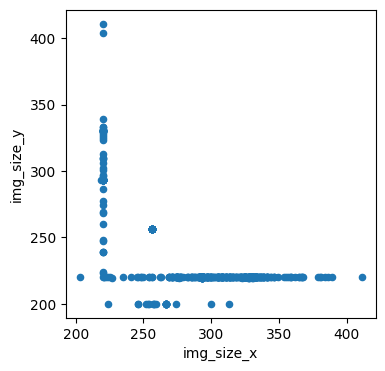

In [28]:
df.plot(kind="scatter", x="img_size_x", y="img_size_y", figsize=(4, 4))


array([[<Axes: title={'center': 'img_size_x'}>,
        <Axes: title={'center': 'img_size_y'}>]], dtype=object)

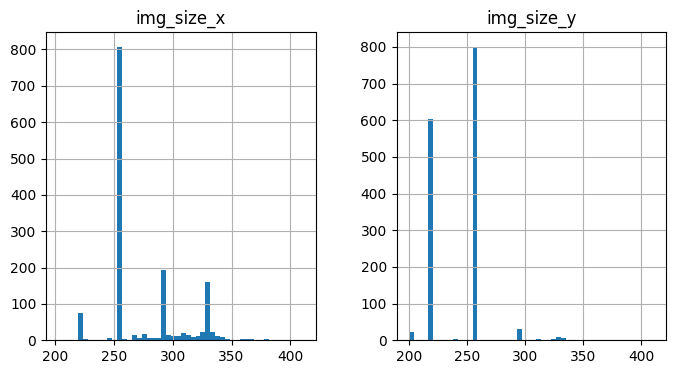

In [29]:
df.hist(bins=50, figsize=(8, 4))


In [30]:
ROLL_WIN = len(df) // 10
ROLL_WIN

150

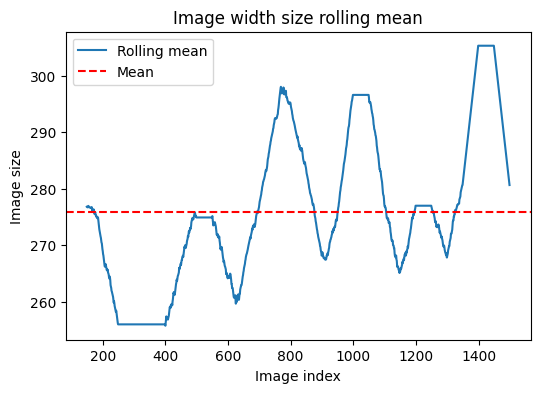

In [31]:
# Plot the rolling mean of the image size with the mean
df["img_size_x"].rolling(ROLL_WIN).mean().plot(figsize=(6, 4))
plt.axhline(df["img_size_x"].mean(), color="r", linestyle="--")
plt.title("Image width size rolling mean")
plt.ylabel("Image size")
plt.xlabel("Image index")
plt.legend(["Rolling mean", "Mean"])


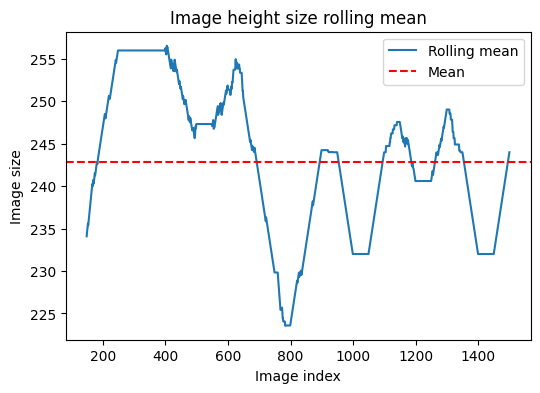

In [32]:
df["img_size_y"].rolling(ROLL_WIN).mean().plot(figsize=(6, 4))
plt.axhline(df["img_size_y"].mean(), color="r", linestyle="--")
plt.title("Image height size rolling mean")
plt.ylabel("Image size")
plt.xlabel("Image index")
plt.legend(["Rolling mean", "Mean"])


Text(0.5, 0, 'Label')

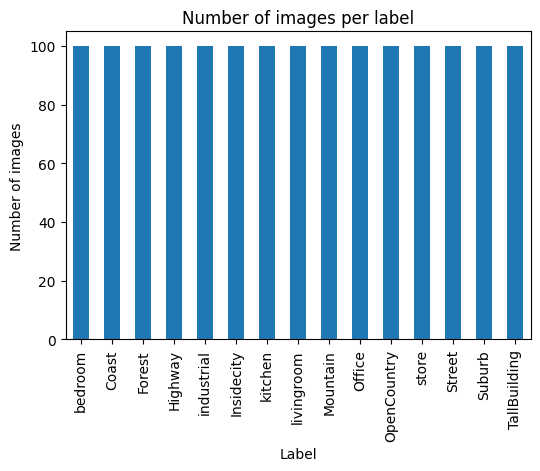

In [33]:
df["label"].value_counts().plot(kind="bar", figsize=(6, 4))
plt.title("Number of images per label")
plt.ylabel("Number of images")
plt.xlabel("Label")


<Axes: xlabel='label'>

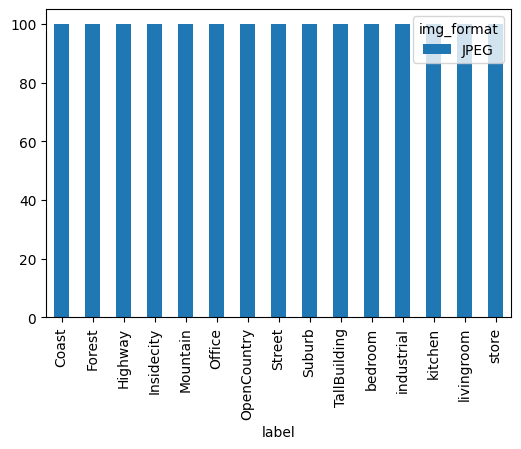

In [34]:
# Check the img format for each label
df.groupby("label")["img_format"].value_counts().unstack().plot(
    kind="bar", figsize=(6, 4)
)


<Axes: xlabel='label'>

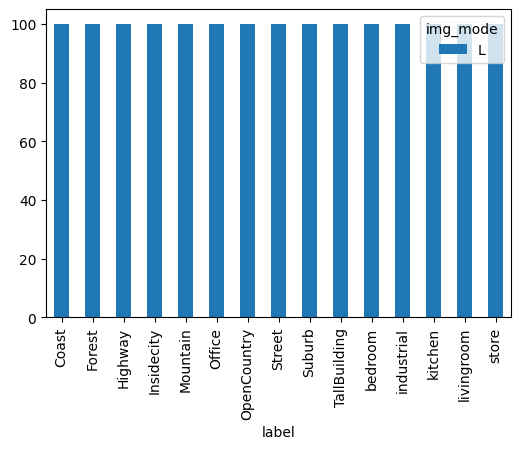

In [35]:
df.groupby("label")["img_mode"].value_counts().unstack().plot(
    kind="bar", figsize=(6, 4)
)
